Importing Libraries

# New Section

Importing Libraries

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Loading Training Dataset

In [6]:
dataset_train = pd.read_csv("TCS.NS.csv")
dataset_train.head()

FileNotFoundError: ignored

Use the Open Stock Price Column to Train Model

In [ ]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[4033.949951]
 [4012.      ]
 [3910.      ]
 [3807.      ]
 [3840.      ]
 [3769.5     ]
 [3731.      ]
 [3646.      ]
 [3749.      ]
 [3770.      ]
 [3827.899902]
 [3851.      ]
 [3815.300049]
 [3791.      ]
 [3791.550049]
 [3750.      ]
 [3789.800049]
 [3752.5     ]
 [3724.      ]
 [3786.      ]
 [3844.      ]
 [3825.      ]
 [3769.      ]
 [3810.      ]
 [3650.      ]
 [3611.      ]
 [3474.      ]
 [3468.      ]
 [3490.      ]
 [3552.5     ]
 [3562.850098]
 [3501.5     ]
 [3450.      ]
 [3460.      ]
 [3605.      ]
 [3684.      ]
 [3603.25    ]
 [3580.      ]
 [3659.      ]
 [3640.5     ]
 [3696.600098]
 [3696.      ]
 [3640.      ]
 [3708.      ]
 [3700.      ]
 [3759.899902]
 [3695.      ]
 [3694.75    ]
 [3738.      ]
 [3740.      ]
 [3748.      ]
 [3762.      ]
 [3772.      ]
 [3809.300049]
 [3745.5     ]
 [3690.      ]
 [3690.      ]
 [3683.      ]
 [3707.      ]
 [3610.      ]
 [3550.      ]
 [3500.      ]
 [3580.      ]
 [3581.100098]
 [3558.      ]
 [3575.149902]
 [3546.   

Normalizing Dataset

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

NameError: ignored

Creating X_train and y_train Data Structures for training

In [3]:
x_train = []
y_train = []
for i in range(10,249):
  x_train.append(scaled_training_set[i-10:i,0])
  y_train.append(scaled_training_set[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)
print(y_train.shape)

NameError: ignored

Reshape the data

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(239, 10, 1)

Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 96, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 96, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 96, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 96))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

Model fitting

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
8/8 [==============================] - 7s 34ms/step - loss: 0.0821
Epoch 2/100
8/8 [==============================] - 0s 38ms/step - loss: 0.0331
Epoch 3/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0193
Epoch 4/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0167
Epoch 5/100
8/8 [==============================] - 0s 42ms/step - loss: 0.0128
Epoch 6/100
8/8 [==============================] - 0s 63ms/step - loss: 0.0122
Epoch 7/100
8/8 [==============================] - 1s 77ms/step - loss: 0.0122
Epoch 8/100
8/8 [==============================] - 1s 86ms/step - loss: 0.0135
Epoch 9/100
8/8 [==============================] - 1s 73ms/step - loss: 0.0104
Epoch 10/100
8/8 [==============================] - 0s 62ms/step - loss: 0.0106
Epoch 11/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0109
Epoch 12/100
8/8 [==============================] - 1s 89ms/step - loss: 0.0102
Epoch 13/100
8/8 [==============================]

Extracting the Actual Stock Prices

In [ ]:
dataset_test = pd.read_csv("TCS.NS.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

Preparing the Input for the Model

In [ ]:
dataset_total= pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-10:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test=[]
for i in range(10,260):
  x_test.append(inputs[i-10:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


Predicting the Stock Prices

In [ ]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 10ms/step


Plotting graph

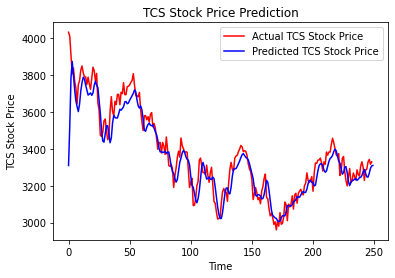

In [ ]:
plt.plot(actual_stock_price, color='red', label='Actual TCS Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()